## Часть 1
Напишите скрипт, который скачивает все данные с выборов губернатора СПб 2019г для всех избирательных участков. 

Входная точка [по ссылке](http://notelections.online/region/region/st-petersburg?action=show&root=1&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217417&type=222). Затем нужно перейти на сайты территориальных избирательных комиссий. Результаты нужно сохранить в  `cvs`-файл, `sqlite` базе данных или `parquet`-файле. В итоге должна получиться таблица с полями:
- название ТИК (территориальная избирательная комиссия, некоторое объединение избирательных участков на определенной территории)
- номер УИК (избирательный участок)
- 14 стандартных полей из итогового протокола

Скрипт должен быть в отдельном `*.py` файле или в отдельном `jupyter`-ноутбуке. 

### Часть 2
Используя скаченные данные и `Pandas` (или `PySpark`) посчитайте:
- явку (%) по всем ТИК, результат отсортировать по убыванию
- выберите произвольного кандидата и найдите тот избиратльный участок, на котором он получил наибольший результат  (%, учитывать участки на которых проголосовало больше 100 человек)
- найдите ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна
- посчитайте дисперсию по явке для каждого ТИК (учитывать УИК)
- для каждого кандидата посчитайте таблицу: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат
- визуализируйте отношение - явка на УИК $\rightarrow$ результат кандидата. 

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv', index_col = 0)

In [2]:
data.head()

,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,ТИК
УИК №1,1803,1200,587,11,602,11,587,23,575,0,0,110,345,120,Территориальная избирательная комиссия №1
УИК №2,1466,1100,433,14,653,14,430,19,425,0,0,53,326,46,Территориальная избирательная комиссия №1
УИК №3,2092,1600,576,22,1002,22,576,15,583,0,0,155,332,96,Территориальная избирательная комиссия №1
УИК №4,1056,1000,318,4,678,4,318,13,309,0,0,67,171,71,Территориальная избирательная комиссия №1
УИК №5,1827,1400,495,8,897,8,493,16,485,0,0,137,266,82,Территориальная избирательная комиссия №1


# 1. Посчитать явку (%) по всем ТИК, результат отсортировать по убыванию


Явку будем считать как отношение числа действительных избирательных бюллетеней к числу избирателей, внесенных в список избирателей на момент окончания голосования

In [3]:
ratio = data['Число действительных избирательных бюллетеней'] / data['Число избирателей, внесенных в список избирателей на момент окончания голосования'] 
ratio = np.array(ratio)
TIK = data['ТИК']
TIK = np.array(TIK)
d = {'ТИК': pd.Series(TIK, index = range(len(TIK))), 'Явка': pd.Series(ratio * 100, index = range(len(TIK)))}
result_1 = pd.DataFrame(d).groupby('ТИК').mean().sort_values(by = 'Явка', ascending = False)
result_1

,Явка
ТИК,
Территориальная избирательная комиссия №18,51.403167
Территориальная избирательная комиссия №15,49.268268
Территориальная избирательная комиссия №13,43.801869
Территориальная избирательная комиссия №30,40.884777
Территориальная избирательная комиссия №19,38.481687
Территориальная избирательная комиссия №2,37.620132
Территориальная избирательная комиссия №8,37.232256
Территориальная избирательная комиссия №23,36.790396
Территориальная избирательная комиссия №20,35.377543


In [4]:
df_ = data.copy()
df_[(df_['Число действительных избирательных бюллетеней']) <= 100] = 0
ratio = df_['Беглов Александр Дмитриевич'] / (df_['Число действительных избирательных бюллетеней'])
d = {'Беглов': pd.Series(ratio * 100, index = data.index)}
Beglov = pd.DataFrame(d)
Beglov.head()

,Беглов
УИК №1,60.000000
УИК №2,76.705882
УИК №3,56.946827
УИК №4,55.339806
УИК №5,54.845361


In [5]:
print(Beglov.sort_values(by = 'Беглов', ascending = False)['Беглов'][0], end = '%\n')
print(Beglov.sort_values(by = 'Беглов', ascending = False)['Беглов'].index[0])

98.04511278195488%
УИК №403


In [6]:
ratio = data['Число действительных избирательных бюллетеней'] / data['Число избирателей, внесенных в список избирателей на момент окончания голосования'] 
ratio = np.array(ratio)
TIK = data['ТИК']
TIK = np.array(TIK)
d = {'ТИК': pd.Series(TIK, index = data.index), 'Явка': pd.Series(ratio * 100, index = data.index)}
df_ = pd.DataFrame(d)
result_3 = df_.groupby('ТИК').max() - df_.groupby('ТИК').min()
print(result_3['Явка'].idxmax())
print(result_3['Явка'].max())

Территориальная избирательная комиссия №11
80.75199871571242


In [7]:
ratio = data['Число действительных избирательных бюллетеней'] / data['Число избирателей, внесенных в список избирателей на момент окончания голосования'] 
ratio = np.array(ratio)
TIK = data['ТИК']
TIK = np.array(TIK)
d = {'ТИК': pd.Series(TIK, index = np.arange(len(TIK))), 'Явка': pd.Series(ratio, index = range(len(TIK)))}
result_4 = pd.DataFrame(d).groupby('ТИК')['Явка'].var().sort_values()
result_4

ТИК
Территориальная избирательная комиссия №25    0.000804
Территориальная избирательная комиссия №6     0.001851
Территориальная избирательная комиссия №14    0.003000
Территориальная избирательная комиссия №12    0.003102
Территориальная избирательная комиссия №7     0.006387
Территориальная избирательная комиссия №3     0.006911
Территориальная избирательная комиссия №10    0.007490
Территориальная избирательная комиссия №16    0.010258
Территориальная избирательная комиссия №9     0.011221
Территориальная избирательная комиссия №5     0.013102
Территориальная избирательная комиссия №20    0.016435
Территориальная избирательная комиссия №27    0.018749
Территориальная избирательная комиссия №1     0.018813
Территориальная избирательная комиссия №26    0.019277
Территориальная избирательная комиссия №19    0.020783
Территориальная избирательная комиссия №4     0.022186
Территориальная избирательная комиссия №8     0.022228
Территориальная избирательная комиссия №11    0.023409
Террит

In [8]:
df_ = pd.DataFrame()
df_['Амосов Михаил Иванович'] = (100 * data['Амосов Михаил Иванович'] / data['Число действительных избирательных бюллетеней']).astype(int)
df_['Беглов Александр Дмитриевич'] = (100 * data['Беглов Александр Дмитриевич'] / data['Число действительных избирательных бюллетеней']).astype(int)
df_['Тихонова Надежда Геннадьевна'] = (100 * data['Тихонова Надежда Геннадьевна'] / data['Число действительных избирательных бюллетеней']).astype(int)

beglov = []
amosov = []
tihonova = []
for i in range(101):
    beglov.append(len(df_[df_['Беглов Александр Дмитриевич'] == i]))
    amosov.append(len(df_[df_['Амосов Михаил Иванович'] == i]))
    tihonova.append(len(df_[df_['Тихонова Надежда Геннадьевна'] == i]))
beglov = np.array(beglov)
amosov = np.array(amosov)
tihonova = np.array(tihonova)
d = {'Амосов Михаил Иванович': pd.Series(amosov, index = range(101)), 'Беглов Александр Дмитриевич': pd.Series(beglov, index = range(101)), 'Тихонова Надежда Геннадьевна': pd.Series(tihonova, index = range(101))}

In [9]:
df = pd.DataFrame(d)
df

,Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна
0,4,0,2
1,5,0,5
2,4,0,7
3,9,0,10
4,12,0,11
...,...,...,...
96,0,1,0
97,0,3,0
98,0,1,0
99,0,0,0


In [10]:
ratio = data['Число действительных избирательных бюллетеней'] / data['Число избирателей, внесенных в список избирателей на момент окончания голосования'] 
ratio = np.array(ratio)
TIK = data['ТИК']
TIK = np.array(TIK)
d = {'ТИК': pd.Series(TIK, index = data.index), 'Явка': pd.Series(ratio, index = data.index)}
df_ = pd.DataFrame(d)
df__ = data
df__['Явка'] = df_['Явка']
df__['Амосов Михаил Иванович'] /= df__['Число действительных избирательных бюллетеней']
df__.sort_values(by='Явка').plot(x = 'Явка', y = 'Амосов Михаил Иванович')

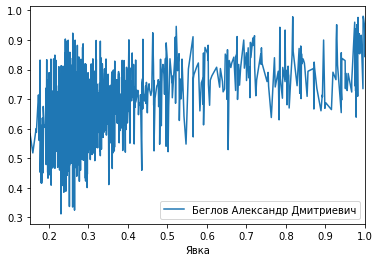

In [11]:
df__['Беглов Александр Дмитриевич'] /= df__['Число действительных избирательных бюллетеней']
df__.sort_values(by='Явка').plot(x = 'Явка', y = 'Беглов Александр Дмитриевич')

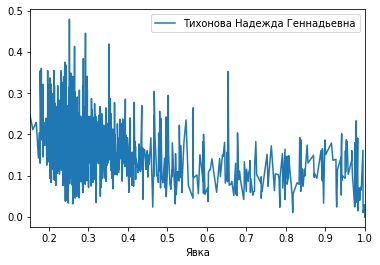

In [12]:
df__['Тихонова Надежда Геннадьевна'] /= df__['Число действительных избирательных бюллетеней']
df__.sort_values(by='Явка').plot(x = 'Явка', y = 'Тихонова Надежда Геннадьевна')